<a href="https://colab.research.google.com/github/xxvazquez/Food-and-Symptoms-Tracker/blob/main/Food_and_Symptoms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Food Tracker Analysis**

This notebook loads and analyzes data from the "Food Tracker" Google Sheet. The sheet contains information on meals, ingredients, cooking methods, and various attributes related to food consumption.

The steps in this notebook include:
1. Authenticating with Google Sheets API.
2. Loading the spreadsheet and accessing the "Food Tracker" sheet.
3. Importing the data into a pandas DataFrame for analysis.

Below is the code to load the data into a DataFrame:



In [57]:
import pandas as pd
import gspread
from google.colab import auth
from google.auth.transport.requests import Request
from google.auth import default
from IPython.display import display

# Authenticate the user
auth.authenticate_user()

# Get default credentials
creds, _ = default()

# Authorize gspread with the credentials
gc = gspread.authorize(creds)

# Load the spreadsheet and worksheet by name
spreadsheet_url = "https://docs.google.com/spreadsheets/d/1NUaTvo0sFL8ipS4nD56tigPI8X0buMePyrRJXHDj6_k/edit?gid=692498170#gid=692498170"
sheet = gc.open_by_url(spreadsheet_url)

# Get the "Food Tracker" sheet by name
worksheet = sheet.worksheet("Food Tracker")

# Load data into a pandas DataFrame
data = worksheet.get_all_values()

# Convert to DataFrame
headers = data[0]  # First row contains column headers
df = pd.DataFrame(data[1:], columns=headers)

# Display the first few rows of the DataFrame
display(df.head())


,Timestamp,Meal type,Recipe name,Rate your meal,Food source(s),Meal size,Cooking method(s),Fat added for cooking,Fat added after cooking,Food consistency,...,Broth,Posture,Behaviors [Screen usage],Behaviors [Meal duration],Meal time morning,Meal time afternoon,Meal time night,Difficulty eating,Liquid content,Temperature of the meal
0,2025-01-12 09:54:44,Breakfast,Pear and orange smoothie,1,Home-cooked,Medium,Raw,,,Liquid,...,,Bad posture,Minimal,Minimal,10:30,,,,,
1,2025-01-12 17:23:02,Lunch,Chicken pho,5,Takeaway,Medium,Boiled,,,Mixed,...,Chicken broth,Bad posture,Moderate,Moderate,,,17:45,,,
2,2025-01-12 17:24:12,Snack,Lactose free milk 1.5%,5,Home-cooked,Small,Microwaved,,,Liquid,...,,,,,,,17:30,,,
3,2025-01-12 22:15:07,Dinner,"Chicken with buckwheat, avocado and kiwi",4,Home-cooked,Medium,"Boiled, Raw, Sautéed",Ghee,,Solid,...,,Bad posture,Excessive,Excessive,,,22:00,1,,
4,2025-01-13 11:45:13,Breakfast,Carrot soup with minced chicken,3,Home-cooked,Medium,"Boiled, Sautéed",Ghee,,Mixed,...,Chicken broth - homemade,Bad posture,Excessive,Moderate,10:00,,,2,,


# **Ingredient Frequency Visualization by Category**


In this notebook, we analyze the frequency of ingredients within various food categories, derived from my meal tracker dataset. For each category, we visualize the top 20 most frequently consumed ingredients using bar plots. This helps to provide insight into which ingredients are consumed most often within each category, aiding in understanding dietary habits and ingredient preferences.

**Categories Covered:**
1. **Protein**
2. **Vegetables**
3. **Grains**
4. **Fruits**
5. **Dairy, Cheeses, and Subs**
6. **Legumes**
7. **Others**
   **Sweeteners**
8. **Spices & Fresh Herbs**

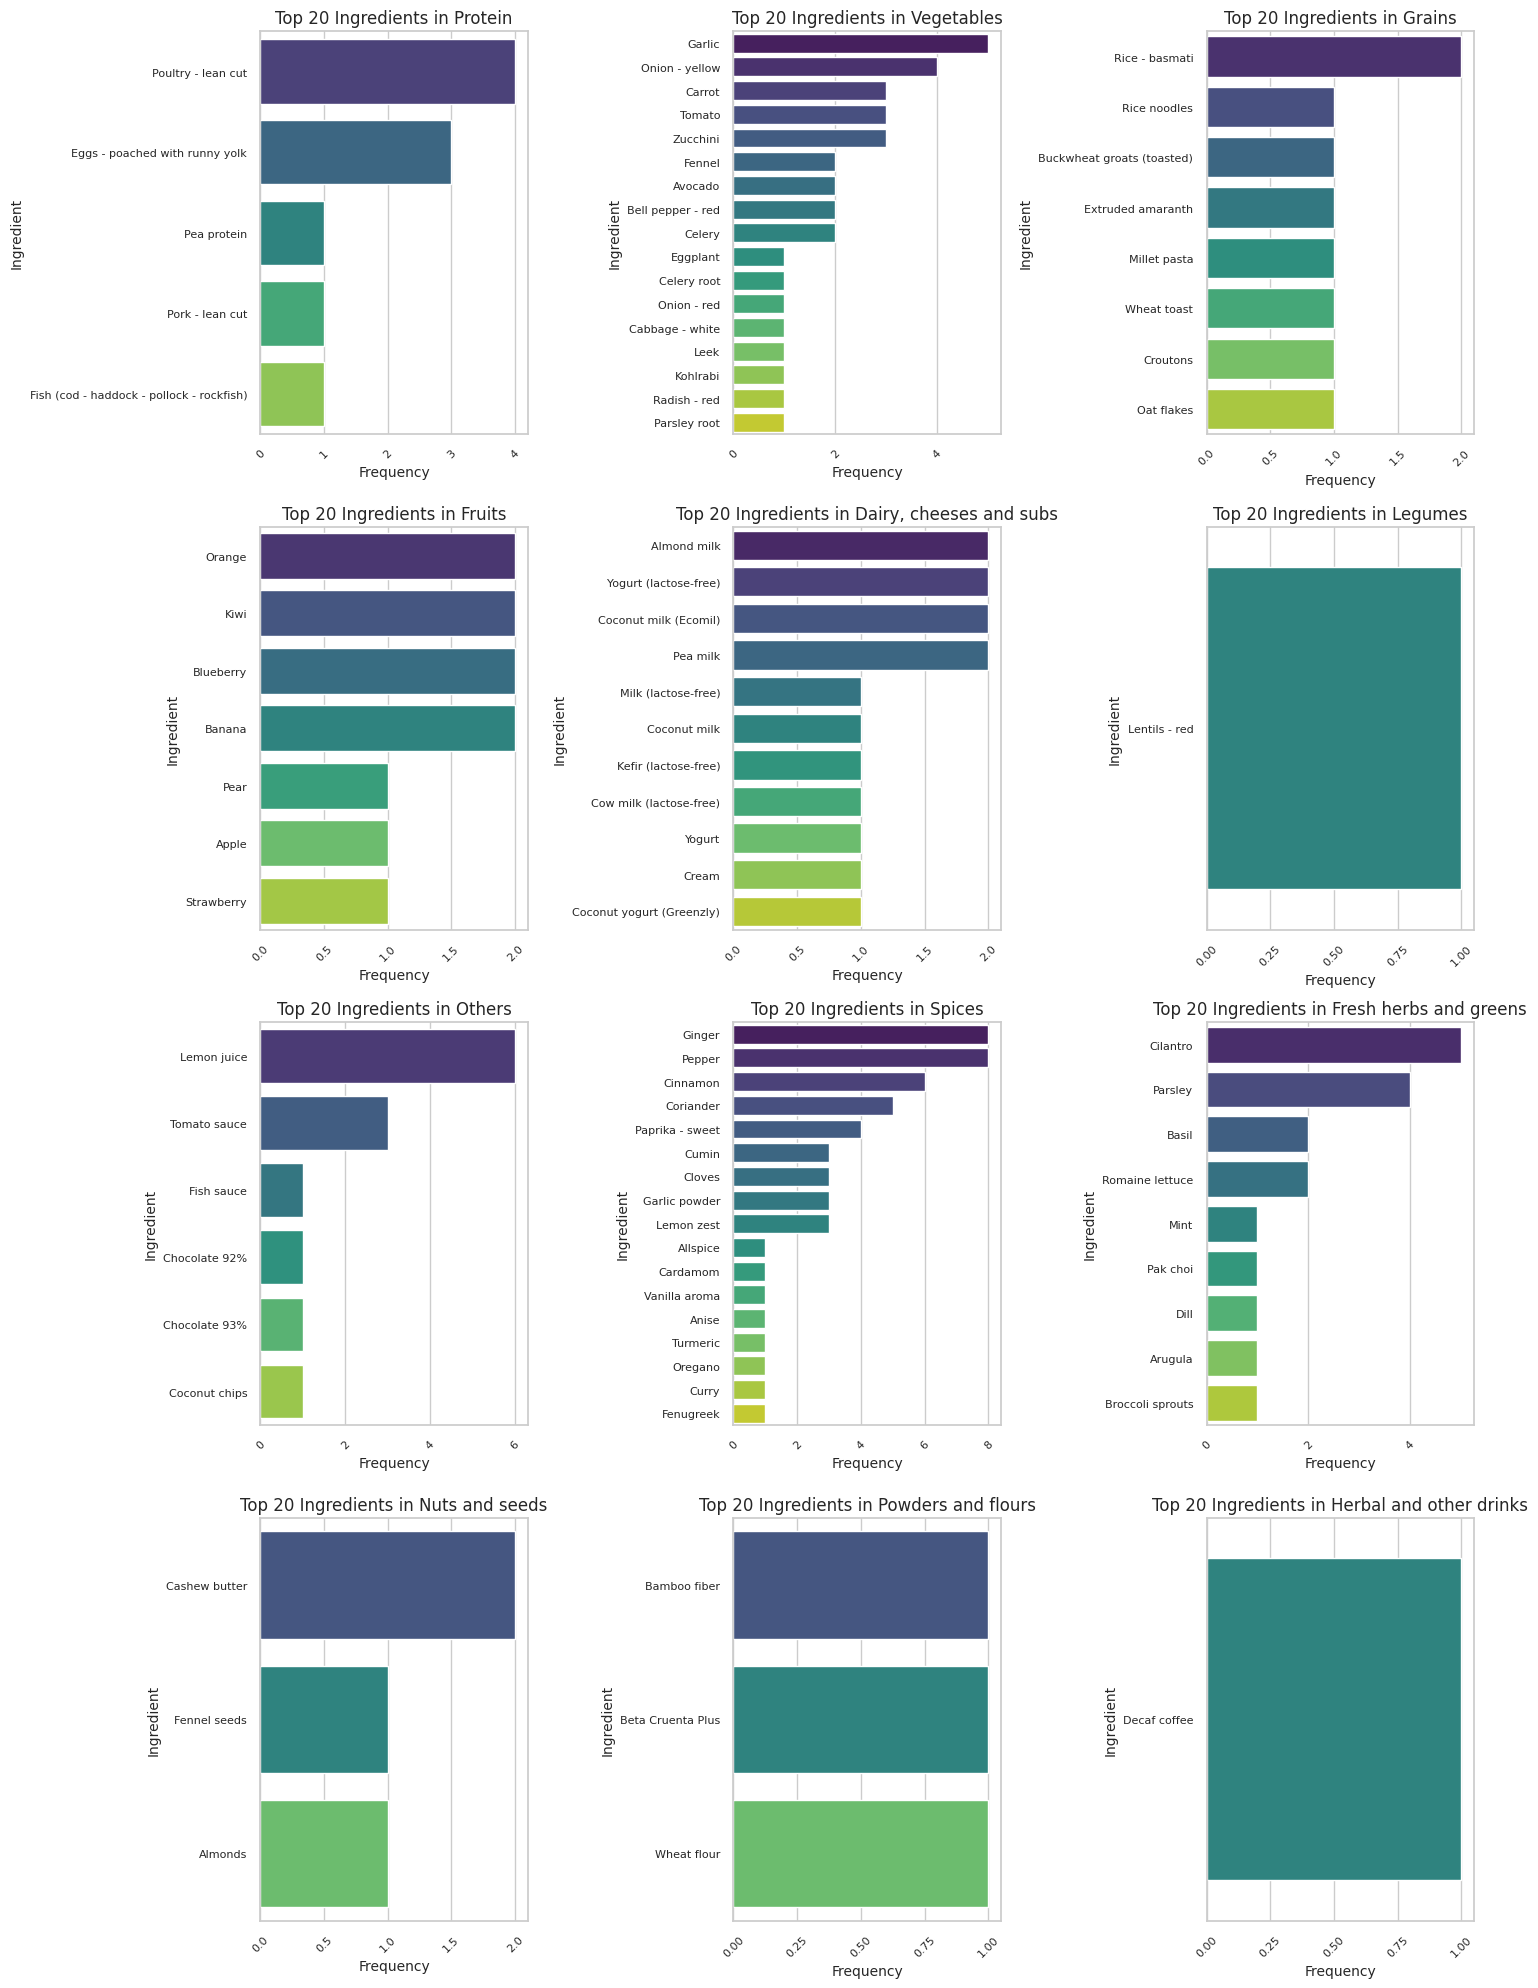

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import math

# List of columns that contain the ingredient categories in the desired order
categories = [
    'Protein',
    'Vegetables',
    'Grains',
    'Fruits',
    'Dairy, cheeses and subs',
    'Legumes',
    'Others',
    'Spices',
    'Fresh herbs and greens',
    'Nuts and seeds',
    'Powders and flours',
    'Herbal and other drinks'
]

# Define number of columns for subplots
cols = 3

# Calculate number of rows needed based on the number of categories
rows = math.ceil(len(categories) / cols)

# Create subplots for the categories dynamically
plt.figure(figsize=(cols * 5, rows * 5))  # Adjust overall figure size based on rows and columns

# Loop through each category and plot the ingredient frequency
for i, category in enumerate(categories, 1):
    # Create a list to hold all ingredients for the current category
    category_ingredients = []

    # Loop through the rows in the current category column and split the ingredients
    for row in df[category]:
        if row:  # if there's a value in the cell
            ingredients = row.split(',')  # Split by commas to get individual ingredients
            category_ingredients.extend([ingredient.strip() for ingredient in ingredients])  # Add them to the list

    # Count the frequency of each ingredient
    category_ingredient_counts = Counter(category_ingredients)

    # Create a DataFrame from the counts
    category_ingredient_count_df = pd.DataFrame(category_ingredient_counts.items(), columns=['Ingredient', 'Frequency'])

    # Sorting by frequency and limiting to the top 20
    category_ingredient_count_df = category_ingredient_count_df.sort_values(by='Frequency', ascending=False).head(20)

    # Subplot arrangement (rows x cols, i-th graph)
    plt.subplot(rows, cols, i)  # Adjusted to dynamic rows and columns

    # Plotting
    sns.barplot(x='Frequency', y='Ingredient', data=category_ingredient_count_df, palette="viridis", hue='Ingredient')

    # Add title and labels
    plt.title(f'Top 20 Ingredients in {category}', fontsize=12)
    plt.xlabel('Frequency', fontsize=10)
    plt.ylabel('Ingredient', fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)

# Adjust layout for spacing
plt.tight_layout()

# Show all the plots
plt.show()


# Meal Ratings Distribution

This visualization shows the distribution of meal ratings based on the **"Rate your meal"** column from the dataset. It provides an overview of how frequently different ratings have been given to meals. By analyzing this distribution, you can gain insights into:

- How often meals are enjoyed or rated highly.
- Identify patterns in overall meal satisfaction.

The bar chart represents the count of each rating, helping to highlight trends, such as whether meals are generally rated more positively or negatively over time.


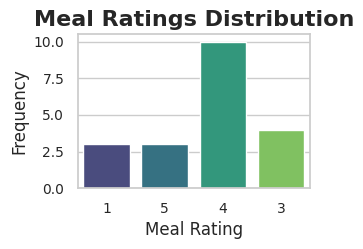

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a count plot to visualize the distribution of meal ratings
plt.figure(figsize=(3, 2))  # Adjust figure size
sns.countplot(x='Rate your meal', data=df, palette='viridis', hue='Rate your meal', legend=False)

# Title and labels
plt.title('Meal Ratings Distribution', fontsize=16, weight='bold')
plt.xlabel('Meal Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Customizing the plot
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.show()


## Food Sources Breakdown: Home-cooked vs Takeaway

This visualization shows the distribution of food sources in the dataset, categorizing meals. The chart helps to understand the proportion of homemade meals compared to those ordered or bought from outside sources.


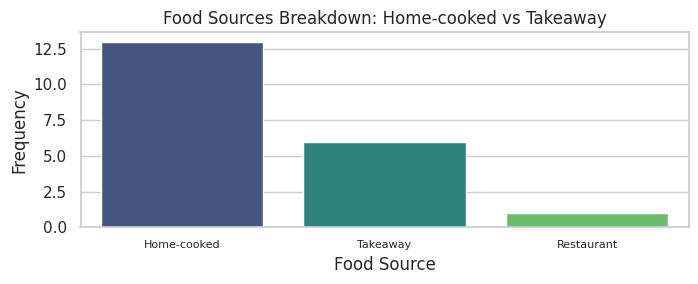

In [63]:
# Food sources breakdown (Home-cooked vs Takeaway)
plt.figure(figsize=(7, 3))
sns.countplot(x='Food source(s)', data=df, palette='viridis', hue="Food source(s)")
plt.legend([], frameon=False)  # Remove the legend
plt.title('Food Sources Breakdown: Home-cooked vs Takeaway')
plt.xlabel('Food Source')
plt.ylabel('Frequency')
plt.xticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()


# Fat Consumption Patterns

This visualization displays the distribution of overall fat levels in meals, showing how frequently different fat levels have been recorded.

## Insights:
- The **count plot** illustrates the frequency of meals at various overall fat levels.
- The analysis helps to identify the consumption patterns related to fat, which can provide insights into dietary habits and fat intake across the data.

This plot uses a color palette (`coolwarm`) to visually distinguish between the different fat levels and highlights the distribution of fat consumption in the dataset.


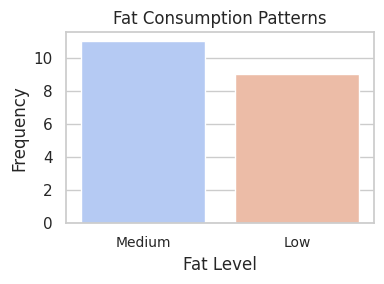

In [71]:
# Plotting the distribution of Overall Fat levels
plt.figure(figsize=(4, 3))
sns.countplot(x='Overall fat', data=df, palette='coolwarm', hue='Overall fat')
plt.legend([], frameon=False)  # Remove the legend
plt.title('Fat Consumption Patterns')
plt.xlabel('Fat Level')
plt.ylabel('Frequency')
plt.xticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


# Behavior Patterns During Meals

This visualization presents the analysis of different behaviors during meals, focusing on stress level, water intake, and screen usage at different times of the day (morning, afternoon, night).

## Insights:
- **Stress Level During Meals**: This box plot displays the distribution of stress levels at different meal times, helping to identify patterns in how stress fluctuates during the day.
- **Water Intake During Meals**: The box plot for water intake highlights the variation in water intake across the different meal times.
- **Screen Usage During Meals**: This plot shows the relationship between meal times and screen usage, which could help identify habits related to screen consumption during meals.

The three plots are arranged side by side for better comparison of these behaviors across morning, afternoon, and night meal times.


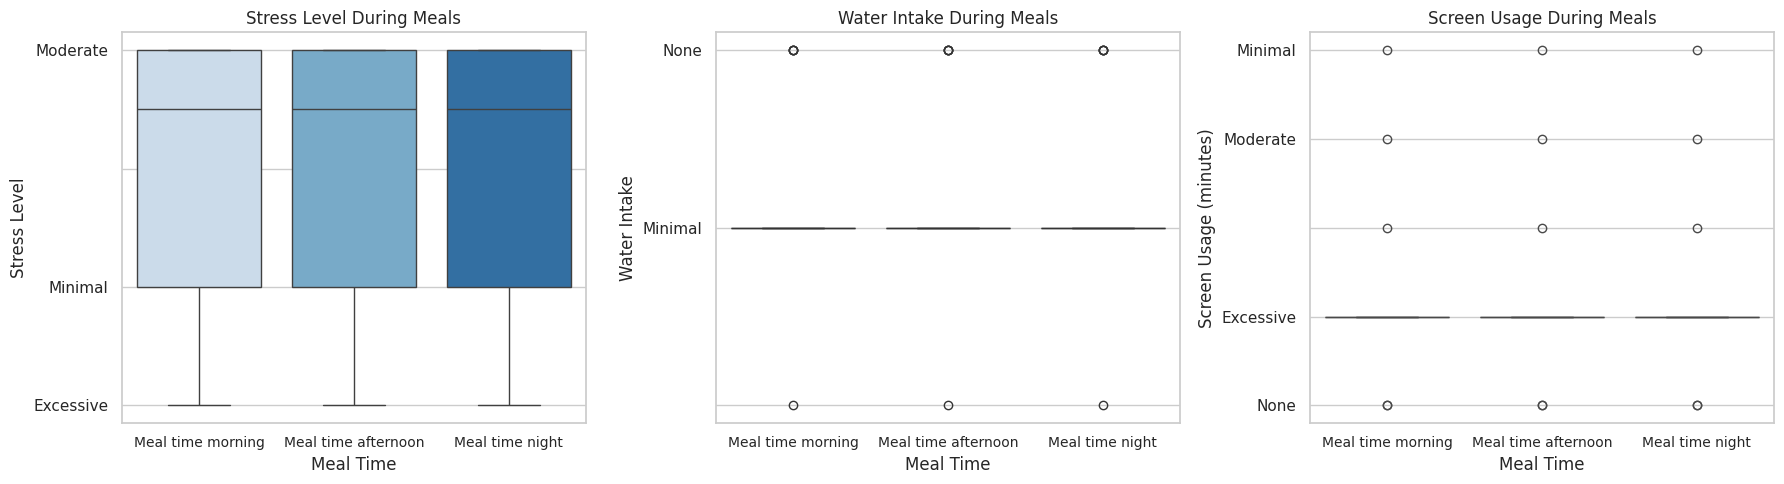

In [81]:
# Reshaping the data
df_long = pd.melt(df, id_vars=['Behaviors [Stress]', 'Behaviors [Water intake]', 'Behaviors [Screen usage]'],
                  value_vars=['Meal time morning', 'Meal time afternoon', 'Meal time night'],
                  var_name='Meal time of day', value_name='Meal time')

# Creating a single figure with 1 row and 3 columns for side-by-side plots
plt.figure(figsize=(18, 5))  # Adjusted for side-by-side layout

# Stress Level During Meals
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first plot
sns.boxplot(x='Meal time of day', y='Behaviors [Stress]', data=df_long, palette='Blues', hue='Meal time of day')
plt.legend([], frameon=False)  # Remove the legend
plt.title('Stress Level During Meals')
plt.xlabel('Meal Time')
plt.ylabel('Stress Level')
plt.xticks(rotation=0, fontsize=10)

# Water Intake During Meals
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second plot
sns.boxplot(x='Meal time of day', y='Behaviors [Water intake]', data=df_long, palette='Greens', hue='Meal time of day')
plt.legend([], frameon=False)  # Remove the legend
plt.title('Water Intake During Meals')
plt.xlabel('Meal Time')
plt.ylabel('Water Intake')
plt.xticks(rotation=0, fontsize=10)

# Screen Usage During Meals
plt.subplot(1, 3, 3)  # 1 row, 3 columns, third plot
sns.boxplot(x='Meal time of day', y='Behaviors [Screen usage]', data=df_long, palette='Purples', hue='Meal time of day')
plt.legend([], frameon=False)  # Remove the legend
plt.title('Screen Usage During Meals')
plt.xlabel('Meal Time')
plt.ylabel('Screen Usage (minutes)')
plt.xticks(rotation=0, fontsize=10)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()




---





---



# Sync Data from SQL to Google Sheets

This notebook is designed to automatically update the "Poopify backup" sheet in Google Sheets by extracting data from a backup SQL file, filtering out records that already exist, and adding only the new rows.

### Workflow:
1. **Google Drive Mount**: The notebook mounts my Google Drive to access files.
2. **Google Sheets Authentication**: It authenticates the user to read and write to Google Sheets.
3. **SQL Parsing**: The SQL backup file is parsed to extract relevant log data into a DataFrame.
4. **Filtering**: The notebook filters out existing records based on their `id` to avoid duplicating entries.
5. **Inserting New Data**: New rows are then added to the Google Sheet, and it prints the number of new rows added or a message saying "No rows to be added."

### Key Features:
- **Automatic Filtering**: It dynamically filters new rows that don't already exist in the Google Sheets by comparing `id` values.
- **Date Filtering**: Data is filtered by date, allowing for the inclusion of logs from a specific date onward.
- **Google Sheets Update**: It ensures that only the necessary new data is added to the Google Sheet.

### How It Works:
- It reads a `.sql` backup file stored in Google Drive.
- Parses SQL `INSERT` statements into a structured DataFrame.
- Compares the parsed data with existing records in Google Sheets.
- Adds only new records to avoid duplication.

### Notes:
- The script assumes that the Google Sheet is already set up with the same columns as the SQL log data.


In [38]:
from google.colab import drive
import pandas as pd
import re
import gspread
from google.auth import default
from google.colab import auth

# Mount Google Drive to access files
drive.mount('/content/drive')

# Google Sheets Authentication
auth.authenticate_user()  # Authenticate the user to access Google Sheets
creds, _ = default()  # Get default credentials
gc = gspread.authorize(creds)  # Authorize access to Google Sheets

# Function to parse the SQL insert statements
def parse_sql_to_dataframe(sql_text):
    pattern = r"INSERT OR REPLACE INTO log\((.*?)\) VALUES \((.*?)\);"

    columns_25 = [
        'id', 'date', 'hour', 'day_of_week', 'color', 'consistency', 'smell',
        'has_blood', 'is_float', 'has_food', 'lat', 'long', 'volume', 'pain',
        'notes', 'flatulence', 'symptoms', 'f_i', 'time', 'strain', 'mucus',
        'profile', 'medication', 'consistency2', 'hygiene'
    ]

    columns_26 = [
        'id', 'date', 'hour', 'day_of_week', 'color', 'consistency', 'smell',
        'has_blood', 'is_float', 'has_food', 'lat', 'long', 'volume', 'pain',
        'notes', 'flatulence', 'symptoms', 'f_i', 'time', 'strain', 'mucus',
        'profile', 'medication', 'consistency2', 'hygiene', 'girth'
    ]

    rows = re.findall(pattern, sql_text)

    data = []
    for row in rows:
        values = [v if v != "NULL" else '' for v in re.findall(r"'(.*?)'|NULL", row[1])]
        values = [v if v != "NULL" else '' for v in values]

        if len(values) == len(columns_25):
            values.append('')
            values.append('')
        elif len(values) == len(columns_26):
            pass
        else:
            print(f"Skipping invalid row with length: {len(values)}")
            continue

        symptoms_index = len(columns_25) - 7
        if values[symptoms_index]:
            values[symptoms_index] = values[symptoms_index].split(';')

        mapped_values = dict(zip(columns_26, values))
        data.append(mapped_values)

    df = pd.DataFrame(data, columns=columns_26)

    # Convert 'date' column to string before inserting to Google Sheets
    df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d %H:%M:%S')

    df_filtered = df[df['date'] >= '2025-01-01']

    return df_filtered

# Specify the path to your file in Google Drive
file_path = '/content/drive/My Drive/Backups/poopify.sql'

# Read the SQL file as text
with open(file_path, 'r') as file:
    sql_text = file.read()

# Parse the SQL and filter the data
df_filtered = parse_sql_to_dataframe(sql_text)

# Open the Google Sheet by its URL
spreadsheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1NUaTvo0sFL8ipS4nD56tigPI8X0buMePyrRJXHDj6_k/edit?gid=1994524425#gid=1994524425')

# Select the 'Poopify' sheet
sheet = spreadsheet.worksheet("Poopify backup")

# Get existing IDs from the sheet
existing_ids = sheet.col_values(1)[1:]  # Skip the header row

# Filter out rows where the ID is already in the Google Sheet
new_data = df_filtered[~df_filtered['id'].isin(existing_ids)]

# Print the number of new rows that will be added
print(f"Number of new rows to be added: {len(new_data)}")

# Convert the new DataFrame to a list of lists
values_to_insert = new_data.values.tolist()

# Convert lists within cells (e.g., symptoms) to strings
for row in values_to_insert:
    for i, value in enumerate(row):
        if isinstance(value, list):
            row[i] = ', '.join(value)  # Convert lists into comma-separated strings

# Write the new data to the sheet, starting at the next available row
for i, row in enumerate(values_to_insert, start=len(existing_ids) + 2):
    sheet.insert_row(row, i)

if len(new_data) > 0:
    print(f"Number of new rows to be added: {len(new_data)}")
else:
    print("No rows to be added.")



Mounted at /content/drive
Number of new rows to be added: 0
No rows to be added.


# Syncing Poopify Data with Google Sheets

This notebook performs the following steps to keep my Poopify data synchronized across Google Sheets:

- **Authentication**: Connects to Google Sheets using Google Colab’s built-in authentication.
- **Data Retrieval**: Loads the backup data from the "Poopify Backup" Google Sheet.
- **Data Processing**:
  - Extracts relevant columns such as `id`, `date`, `consistency`, `smell`, `floating`, etc.
  - Converts the date format and extracts the day of the week.
  - Cleans up the `hygiene` column based on specific rules (e.g., emptying values with 'water_and_soap' and simplifying 'dirty' entries).
- **Duplicate Check**: Compares the new data with the existing records in the "Poopify" sheet to identify any new rows based on the `id` field.
- **Data Update**: If new data is found, it’s written back into the "Poopify" Google Sheet.
  - If no new data is found, it displays a message indicating no updates.

This process ensures my Google Sheets are always up to date with the latest data from the backup sheet without duplication.


In [39]:
import pandas as pd
import gspread
from google.auth.transport.requests import Request
from google.auth import default

# Google Sheets Authentication
from google.colab import auth
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Open the Poopify Backup sheet
poopify_backup_url = 'https://docs.google.com/spreadsheets/d/1NUaTvo0sFL8ipS4nD56tigPI8X0buMePyrRJXHDj6_k/edit?gid=773954541#gid=773954541'
poopify_backup = gc.open_by_url(poopify_backup_url).worksheet('Poopify backup')

# Load the Poopify Backup data into pandas DataFrame
poopify_backup_data = pd.DataFrame(poopify_backup.get_all_records())

# Select the necessary columns and rename them
poopify_data = pd.DataFrame({
    'id': poopify_backup_data['id'],
    'date': pd.to_datetime(poopify_backup_data['date']).dt.strftime('%Y-%m-%d %H:%M:%S'),  # Convert to string
    'hour': poopify_backup_data['hour'],  # Hour is already just an integer (e.g., "8")
    'day of the week': pd.to_datetime(poopify_backup_data['date']).dt.strftime('%A'),  # Extract day of the week
    'consistency': poopify_backup_data['consistency'],
    'smell': poopify_backup_data['smell'],
    'floating': poopify_backup_data['is_float'],  # Rename as 'floating'
    'has food': poopify_backup_data['has_food'],
    'flatulence': poopify_backup_data['flatulence'],
    'symptoms': poopify_backup_data['symptoms'],
    'time': poopify_backup_data['time'],
    'strain': poopify_backup_data['strain'],
    'consistency2': poopify_backup_data['consistency2'],
    'hygiene': poopify_backup_data['hygiene']
})

# Clean the 'hygiene' column
def clean_hygiene(value):
    if value == 'water_and_soap' or value == 'cleaning_wipes_and_paper':
        return ''  # Set to empty
    elif value.startswith('dirty'):
        return value[-1]  # Extract the last character (0 or 3)
    return value  # Leave other values unchanged

# Apply the cleaning function to the 'hygiene' column
poopify_data['hygiene'] = poopify_data['hygiene'].apply(clean_hygiene)

# Open the Poopify sheet to write the data
poopify_sheet_url = 'https://docs.google.com/spreadsheets/d/1NUaTvo0sFL8ipS4nD56tigPI8X0buMePyrRJXHDj6_k/edit?gid=927667407#gid=927667407'
poopify_sheet = gc.open_by_url(poopify_sheet_url).worksheet('Poopify')

# Get the existing 'id' values from the 'Poopify' sheet
existing_data = pd.DataFrame(poopify_sheet.get_all_records())
existing_ids = existing_data['id'].tolist() if 'id' in existing_data else []

# Filter the new data to only include rows where the 'id' is not already in the existing data
poopify_data_new = poopify_data[~poopify_data['id'].isin(existing_ids)]

# If there is any new data, write it to the 'Poopify' sheet
if not poopify_data_new.empty:
    poopify_sheet.update([poopify_data_new.columns.values.tolist()] + poopify_data_new.values.tolist())
    print(f"{len(poopify_data_new)} new rows added successfully!")
else:
    print("No new data to add.")


No new data to add.


# Analyzing Poop Consistency Over Time

This notebook performs the following steps to analyze the consistency of poop over various time periods and visualize the results:

- **Authentication**: Authenticates and connects to Google Sheets using Google Colab's built-in authentication.
- **Data Retrieval**: Loads the "Poopify" data from Google Sheets into a pandas DataFrame.
- **Data Processing**:
  - Converts the `date` column to a datetime format.
  - Filters out rows where `consistency` is `0` (indicating no poop).
- **Time Periods Filtering**: Filters data for three different time frames:
  - **Last 30 Days**
  - **Last 60 Days**
  - **Last 6 Months**
- **Data Visualization**:
  - Creates side-by-side count plots for each time period, showing the frequency distribution of poop consistency.
  - The plots are color-coded to differentiate between time periods and displayed side by side for easy comparison.

This analysis helps understand the distribution of poop consistency over different time frames.


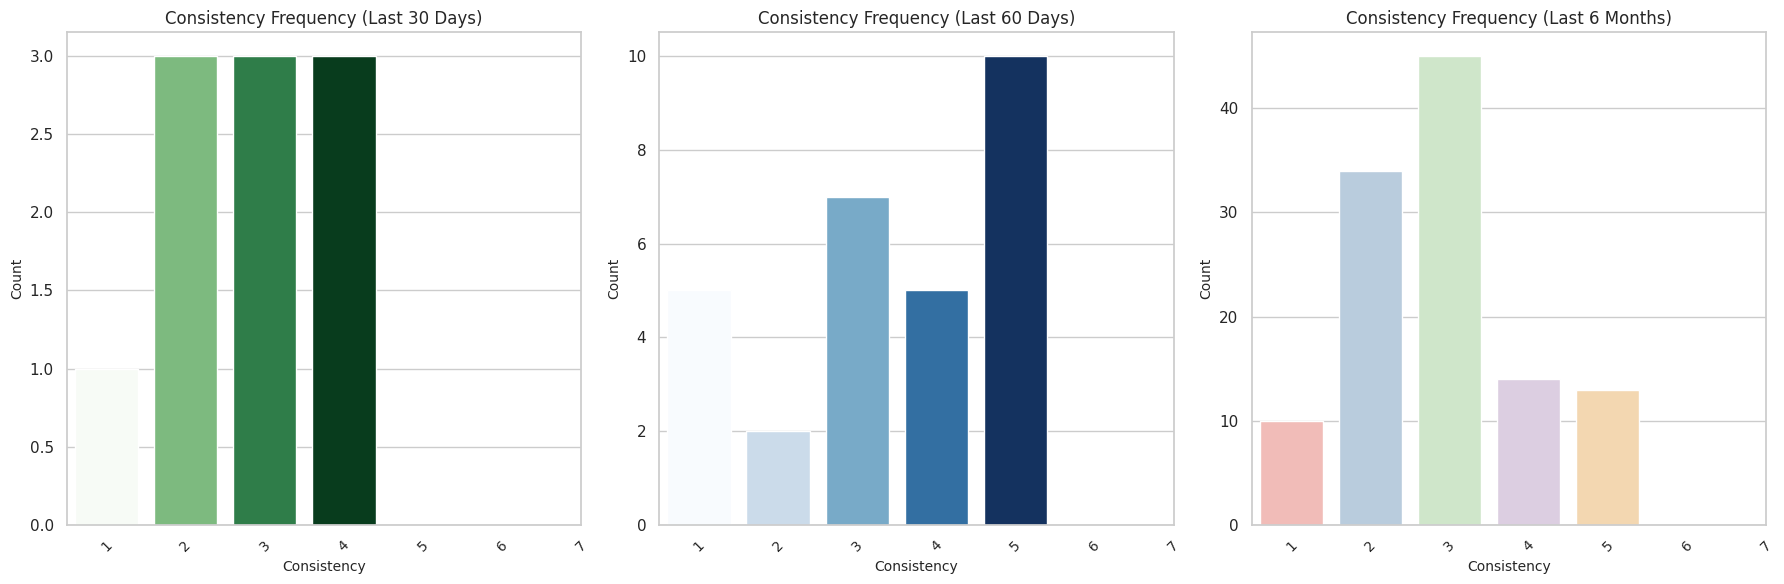

In [40]:
import pandas as pd
import gspread
from google.auth.transport.requests import Request
from google.auth import default
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Google Sheets Authentication
from google.colab import auth
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Open the Poopify sheet
poopify_sheet_url = 'https://docs.google.com/spreadsheets/d/1NUaTvo0sFL8ipS4nD56tigPI8X0buMePyrRJXHDj6_k/edit?gid=927667407#gid=927667407'
poopify_sheet = gc.open_by_url(poopify_sheet_url).worksheet('Poopify')

# Load the Poopify data into pandas DataFrame
poopify_data = pd.DataFrame(poopify_sheet.get_all_records())

# Convert 'date' column to datetime format
poopify_data['date'] = pd.to_datetime(poopify_data['date'])

# Filter out rows where consistency is 0 (no poop)
poopify_data = poopify_data[poopify_data['consistency'] != 0]

# Filter data for the last 30 days, 60 days, and 6 months
last_30_days = datetime.now() - timedelta(days=30)
last_60_days = datetime.now() - timedelta(days=60)
last_6_months = datetime.now() - timedelta(days=182)  # 6 months ≈ 182 days

# Filter for different periods
poopify_30_days = poopify_data[poopify_data['date'] >= last_30_days]
poopify_60_days = poopify_data[poopify_data['date'] >= last_60_days]
poopify_6_months = poopify_data[poopify_data['date'] >= last_6_months]

# Create the visualizations

# Create a figure with 1 row and 3 columns
plt.figure(figsize=(18, 6))  # Adjusted for side-by-side layout

# Last 30 days - Consistency Frequency
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first plot
sns.countplot(x='consistency', data=poopify_30_days, palette='Greens', hue='consistency')
plt.legend([], frameon=False)  # Hide the legend
plt.title('Consistency Frequency (Last 30 Days)', fontsize=12)
plt.xlabel('Consistency', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(ticks=range(7), labels=[str(i) for i in range(1, 8)], rotation=45, fontsize=10)

# Last 60 days - Consistency Frequency
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second plot
sns.countplot(x='consistency', data=poopify_60_days, palette='Blues', hue='consistency')
plt.legend([], frameon=False)  # Hide the legend
plt.title('Consistency Frequency (Last 60 Days)', fontsize=12)
plt.xlabel('Consistency', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(ticks=range(7), labels=[str(i) for i in range(1, 8)], rotation=45, fontsize=10)

# Last 6 months - Consistency Frequency
plt.subplot(1, 3, 3)  # 1 row, 3 columns, third plot
sns.countplot(x='consistency', data=poopify_6_months, palette='Pastel1', hue='consistency')
plt.legend([], frameon=False)  # Hide the legend
plt.title('Consistency Frequency (Last 6 Months)', fontsize=12)
plt.xlabel('Consistency', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(ticks=range(7), labels=[str(i) for i in range(1, 8)], rotation=45, fontsize=10)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
